# kNN Model

## Import Statements

In [1]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import errno
import os
import sys
import copy

## Hyperparameters

In [2]:
sample_bias = 0     # adjust the difference in the number of the two types of samples (no algae vs algae)
test_size = 0.2
num_splits = 10
k = 2               # for k-NN
num_subsets = 10
num_features = 17

## Read in Data

In [3]:
np.set_printoptions(threshold=np.inf)  # prints a full matrix rather than an abbreviated matrix

# define data and destination paths
data_path_hourly = "/Users/Alliot/Documents/CLA-Project/Data/hourly-data-sets/"
# data_path = "/Users/Alliot/Documents/CLA-Project/Data/data-sets/"
# data_set_hourly = "hourly_data_2017"
# data_set = "all_data_summer"
# data_path = "../Data/data/"
X_2015 = np.load(data_path_hourly + 'hourly_X_2015.npy')
X_2016 = np.load(data_path_hourly + 'hourly_X_2016.npy')
X_2017 = np.load(data_path_hourly + 'hourly_X_2017.npy')
X_2018 = np.load(data_path_hourly + 'hourly_X_2018.npy')

y_2015 = np.load(data_path_hourly + 'hourly_y_2015.npy')
y_2016 = np.load(data_path_hourly + 'hourly_y_2016.npy')
y_2017 = np.load(data_path_hourly + 'hourly_y_2017.npy')
y_2018 = np.load(data_path_hourly + 'hourly_y_2018.npy')

X = np.vstack((X_2015, X_2016, X_2017, X_2018))
y = np.hstack((y_2015, y_2016, y_2017, y_2018))
# X = X_2017
# y = y_2017
# load data sets
# X = np.load(data_path_hourly + data_set_hourly + "_edit.npy")
# y = np.load(data_path_hourly + data_set_hourly + "_labels.npy")
X = X.astype(float)
y = y.astype(int)

num_features = X.shape[1]

# manipulate data set. labels are converted to 0, +1 for binary classification; samples are removed uniformly 
# from the data set so that the disproportionately large number of negative samples (no algae) does 
# not bias the model.

num_alg = 0  # count the number of algae instances
num_no_alg = 0  # count the number of no algae instances

# Convert labels to binary: 0 for no algae and 1 for algae
for i in range(0, len(y)):
    if y[i] == 0:
        num_no_alg += 1
    if y[i] == 1 or y[i] == 2:
        y[i] = 1
        num_alg += 1

# undersample the data set by randomly adding occurences of algae until the difference between the number of algae
# samples and no algae samples equals sample_bias (defined below)
# idx = 0
# sample_bias = 0
# while num_alg != (num_no_alg + sample_bias):
#     # circle through the data sets until the difference of num_no_alg and num_alg equals
#     # the value specified by sample_bias
#     if idx >= (len(y) - 1):
#         idx = 0

#     if y[idx] == 0:
#         if np.random.rand() >= 0.5:  # add this sample with some probability
#             y = np.delete(y, idx)
#             X = np.delete(X, obj=idx, axis=0)
#             num_no_alg -= 1
#         else:
#             idx += 1
#     else:
#         idx += 1

In [4]:
# Shuffle the data
shuff_idx = np.arange(X.shape[0])
np.random.shuffle(shuff_idx)

X = X[shuff_idx, :]
y = y[shuff_idx]

In [25]:
# determine weight vector for the each class; used in defining some of the models
num_pos = y.tolist().count(0)
weight_pos = 10000
num_neg = y.tolist().count(1)
weight_neg = 100
weight = {
    0 : weight_pos,
    1 : weight_neg
}

## Define Models

In [26]:
knn = KNeighborsClassifier(
    n_neighbors=k,
    weights="uniform",
    algorithm="brute",
    p=2,
    metric="minkowski",
    n_jobs=None
)

logistic = LogisticRegression(
#     penalty="l2",
    dual=False,
    tol=0.0001,
    C=1,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=weight,
    random_state=None,
    solver="liblinear",
    max_iter=1000,
    verbose=False,
    warm_start=False
)

## Run Models

In [27]:
# Perform 10-fold CV on all models
skf = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=False)

knn_acc = [0] * num_subsets
log_acc = [0] * num_subsets

fold = 1
print("Fold #: ", end=" ")

for train_idx, test_idx in skf.split(X, y):
    print(str(fold), end=" ")
    X_train, X_test = X[train_idx, :], X[test_idx, :]
    y_train, y_test = y[train_idx], y[test_idx]
    
#     length_y_train = len(y_train)
#     num_no_alg = 0
#     num_alg = 0
    
    # count number of labels
#     for i in range(0, length_y_train):
#         if y_train[i] == 0:
#             num_no_alg += 1
#         if y_train[i] == 1:
#             num_alg += 1
    
    # oversample the data set by randomly adding occurences of algae until the difference between the number of algae
    # samples and no algae samples equals sample_bias (defined in hyperparameters section)
#     idx = 0
#     while num_alg != (num_no_alg + sample_bias):
#         # circle through the data sets until the difference of num_no_alg and num_alg equals
#         # the value specified by sample_bias
#         if idx == (length_y_train-1):
#             idx = 0

#         if y_train[idx] == 1:
#             if np.random.rand() >= 0.5:  # add this sample with some probability
#                 y_train = np.append(y_train, y_train[idx])
#                 X_train = np.append(X_train, np.reshape(X_train[idx, :], newshape=(1, num_features)), axis=0)
#                 num_alg += 1
#             else:
#                 idx += 1
#         else:
#             idx += 1
            
#     # randomly shuffle training set
#     train_perm = np.random.permutation(np.arange(X_train.shape[0]))

#     X_train = X_train[train_perm, :]
#     y_train = y_train[train_perm]
    
    X_train = preprocessing.scale(X_train, axis=1, with_mean=True, with_std=True)
    X_test = preprocessing.scale(X_test, axis=1, with_mean=True, with_std=True)
    
    for i in range(num_subsets):
        sub_idx = int(np.floor(((i+1) * X_train.shape[0])) / float(num_subsets))
        X_train_sub = X_train[:sub_idx, :]        
        y_train_sub = y_train[:sub_idx]
        
        # knn
        knn.fit(X_train_sub, y_train_sub)
        knn_pred = knn.predict(X_test)
        knn_prob = knn.predict_proba(X_test)[:, 1]
        
        # logistic regression
        logistic.fit(X_train_sub, y_train_sub)
        log_pred = logistic.predict(X_test)
        log_prob = logistic.predict_proba(X_test)[:, 1]

        # accuracy calculation
        knn_acc[i] += (np.sum(knn_pred == y_test) / len(y_test))
        log_acc[i] += (np.sum(log_pred == y_test) / len(y_test))
    
    fold += 1

knn_acc[:] = [float(i) / float(num_splits) for i in knn_acc]
log_acc[:] = [float(i) / float(num_splits) for i in log_acc]

Fold #:  1 2 3 4 5 6 7 8 9 10 

## Plot Results

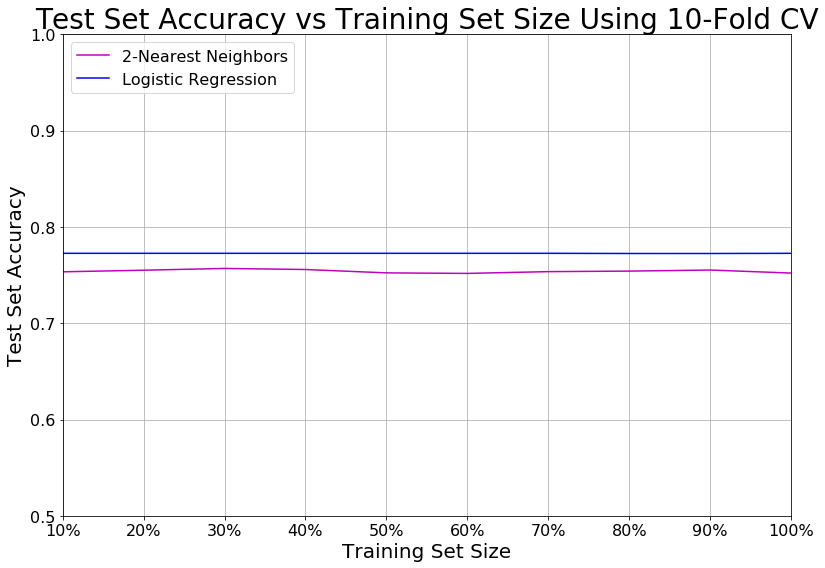

In [28]:
folds = [i+1 for i in range(num_splits)]

plt.figure(figsize=(12, 8))
plt.plot(folds, knn_acc, color="m", label=str(k) + "-Nearest Neighbors")
plt.plot(folds, log_acc, color="b", label="Logistic Regression")
plt.xlabel("Training Set Size", fontsize=20)
plt.xticks(np.arange(num_subsets)+1, ("10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"), fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Test Set Accuracy", fontsize=20)
plt.title("Test Set Accuracy vs Training Set Size Using 10-Fold CV", fontsize=28)
plt.axis([1, num_splits, 0.5, 1])
plt.legend(loc="upper left", prop={"size": 16})
plt.tight_layout()
plt.grid(True)

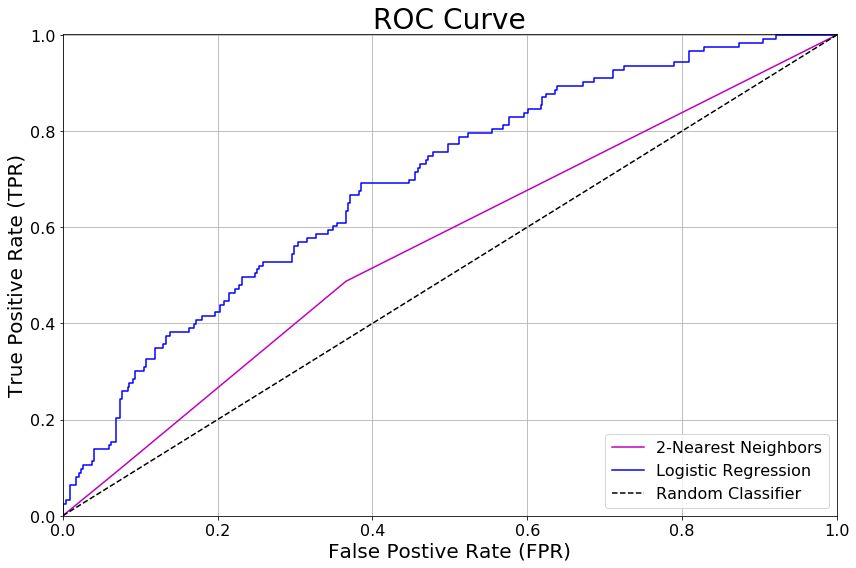

In [29]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob, pos_label=1)
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob, pos_label=1)

plt.figure(figsize=(12, 8))
plt.plot(knn_fpr, knn_tpr, color="m", label=str(k) + "-Nearest Neighbors")
plt.plot(log_fpr, log_tpr, color="b", label="Logistic Regression")
plt.plot(0.1*np.arange(12), 0.1*np.arange(12), color="k", linestyle="dashed", label="Random Classifier")
plt.xlabel("False Postive Rate (FPR)", fontsize=20)
plt.ylabel("True Positive Rate (TPR)", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis([0, 1, 0, 1.001])
plt.title("ROC Curve", fontsize=28)
plt.legend(loc="lower right", prop={"size": 16})
plt.tight_layout()
plt.grid(True)